In [264]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
data_path = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/yelp_labelled.txt"
            )
yelp = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp.columns = ['message', 'rating']

keywords = ['good', 'great', 'friendly', 'love', 'nice', 'pretty', 'better', 'best', 'recommend', 'fresh', 'happy', 'amazing', 'delicious', 'tasty']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.0
    yelp[str(key)] = yelp.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [266]:
yelp['allcaps'] = yelp.message.str.isupper()
yelp['Positive'] = (yelp['rating'] == 1)
yelp.head()

,message,rating,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty,allcaps,Positive
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


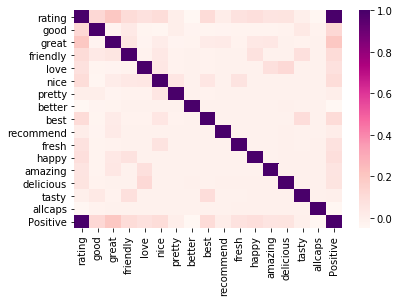

In [308]:
sns.heatmap(yelp.corr(), cmap='RdPu')

In [268]:

data = yelp[keywords + ['allcaps']]
target = yelp['Positive']

In [269]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print('success rate = %s' % ((data.shape[0] - (target != y_pred).sum())/data.shape[0]))

Number of mislabeled points out of a total 1000 points : 375
success rate = 0.625


In [270]:

bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print('success rate = %s' % ((data.shape[0] - (target != y_pred).sum())/data.shape[0]))

Number of mislabeled points out of a total 1000 points : 400
success rate = 0.6


In [271]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
print(bnb)
# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print('success rate = %s' % ((data.shape[0] - (target != y_pred).sum())/data.shape[0]))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Number of mislabeled points out of a total 1000 points : 375
success rate = 0.625


In [310]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, y_pred)
print(cm)

[[476  24]
 [351 149]]


"""

We identified 24/500 is bad reviews when its good. - False Positive.
We identified  351/500 as bad reviews when its good. - False Negative.
We positively identify: 476/500 - Sensitivity - Positive
We negatively identify: 149/500 - Specificity - Negative

"""

In [311]:
# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm[0][0]/(cm[0][0]+cm[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm[1][0]/(cm[1][0]+cm[1][1])))

Sensitivity: 0.952
Specificity: 0.702


""" The ability to predict a positive review is at 95.2%, which is very good. And the Specificity is 70.2%, which is not bad at all. 
We can feel comfortable that our reviews is not bias and is very trustworthy."""

In [273]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.63
Testing on Sample: 0.625


In [274]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.59, 0.61, 0.63, 0.63, 0.63, 0.6 , 0.67, 0.6 , 0.59, 0.67])

In [275]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=20)
print('With 35% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 35% Holdout: 0.6
Testing on Sample: 0.625


In [276]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.59, 0.61, 0.63, 0.63, 0.63, 0.6 , 0.67, 0.6 , 0.59, 0.67])

In [277]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=20)
print('With 50% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 50% Holdout: 0.604
Testing on Sample: 0.625


In [278]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.59, 0.61, 0.63, 0.63, 0.63, 0.6 , 0.67, 0.6 , 0.59, 0.67])

In [279]:

data_pathh = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/amazon_cells_labelled.txt"
            )
amazon = pd.read_csv(data_pathh, delimiter= '\t', header=None)
amazon.columns = ['message', 'rating']

keywords = ['good', 'great', 'friendly', 'love', 'nice', 'pretty', 'better', 'best', 'recommend', 'fresh', 'happy', 'amazing', 'delicious', 'tasty']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon[str(key)] = amazon.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [280]:
amazon['allcaps'] = amazon.message.str.isupper()
amazon['Positive'] = (amazon['rating'] == 1)
amazon.head()

,message,rating,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty,allcaps,Positive
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [281]:
data1 = amazon[keywords + ['allcaps']]
target1 = amazon['Positive']

In [282]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data1, target1)

# Classify, storing the result in a new variable.
y_pred1 = bnb.predict(data1)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != y_pred1).sum()
))
print('success rate = %s' % ((data1.shape[0] - (target1 != y_pred1).sum())/data1.shape[0]))

Number of mislabeled points out of a total 1000 points : 415
success rate = 0.585


In [284]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target1, y_pred1)

array([[498,   2],
       [413,  87]], dtype=int64)

"""

We identified 2/500 is bad reviews when its good. - False Positive.
We identified  413/500 as bad reviews when its good. - False Negative.
We positively identify: 487/500 - Sensitivity - Positive
We negatively identify: 87/500 - Specificity - Negative


"""

In [285]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data1, target1, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data1, target1).score(data1, target1)))

With 20% Holdout: 0.575
Testing on Sample: 0.585


In [286]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data1, target1, cv=10)

array([0.6 , 0.58, 0.59, 0.56, 0.61, 0.56, 0.62, 0.61, 0.57, 0.56])

In [287]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data1, target1, test_size=0.35, random_state=20)
print('With 35% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data1, target1).score(data1, target1)))

With 35% Holdout: 0.58
Testing on Sample: 0.585


In [288]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data1, target1, cv=10)

array([0.6 , 0.58, 0.59, 0.56, 0.61, 0.56, 0.62, 0.61, 0.57, 0.56])

In [289]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data1, target1, test_size=0.5, random_state=20)
print('With 50% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data1, target1).score(data1, target1)))

With 50% Holdout: 0.59
Testing on Sample: 0.585


In [290]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data1, target1, cv=10)

array([0.6 , 0.58, 0.59, 0.56, 0.61, 0.56, 0.62, 0.61, 0.57, 0.56])

In [291]:

# Grab and process the raw data.
data_pathhh = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/imdb_labelled.txt"
            )
imdb = pd.read_csv(data_pathhh, delimiter= '\t', header=None)
imdb.columns = ['message', 'rating']

In [292]:
keywords = ['good', 'great', 'friendly', 'love', 'nice', 'pretty', 'better', 'best', 'recommend', 'fresh', 'happy', 'amazing', 'delicious', 'tasty']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb[str(key)] = imdb.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [293]:
imdb['allcaps'] = imdb.message.str.isupper()
imdb['Positive'] = (imdb['rating'] == 1)
imdb.head()

,message,rating,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty,allcaps,Positive
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [294]:
data2 = imdb[keywords + ['allcaps']]
target2 = imdb['Positive']

In [295]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))
print('success rate = %s' % ((data2.shape[0] - (target2 != y_pred2).sum())/data2.shape[0]))

Number of mislabeled points out of a total 748 points : 332
success rate = 0.5561497326203209


In [296]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target2, y_pred2)

array([[335,  27],
       [305,  81]], dtype=int64)

"""

We identified 27/362 is bad reviews when its good. - False Positive.
We identified  305/386 as bad reviews when its good. - False Negative.
We positively identify: 335/362 - Sensitivity - Positive
We negatively identify: 81/386 - Specificity - Negative

"""

In [297]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data2, target2).score(data2, target2)))

With 20% Holdout: 0.5066666666666667
Testing on Sample: 0.5561497326203209


In [298]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data2, target2, cv=10)

array([0.51315789, 0.46052632, 0.6       , 0.52      , 0.57333333,
       0.53333333, 0.64864865, 0.54054054, 0.52702703, 0.48648649])

In [299]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.35, random_state=20)
print('With 35% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data2, target2).score(data2, target2)))

With 35% Holdout: 0.5381679389312977
Testing on Sample: 0.5561497326203209


In [257]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data2, target2, cv=10)

array([0.51315789, 0.46052632, 0.6       , 0.52      , 0.57333333,
       0.53333333, 0.64864865, 0.54054054, 0.52702703, 0.48648649])

In [300]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.5, random_state=20)
print('With 50% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data2, target2).score(data2, target2)))

With 50% Holdout: 0.5240641711229946
Testing on Sample: 0.5561497326203209


In [301]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data2, target2, cv=10)

array([0.51315789, 0.46052632, 0.6       , 0.52      , 0.57333333,
       0.53333333, 0.64864865, 0.54054054, 0.52702703, 0.48648649])

""" I use Yelp as my main reviews and selected the keywords from there. Total, it have 62% percent of success rate. It have a 
very high outcome of Sensitive and Specificity, showing 95% that it can dectect Positive review and 70% detecing negatives one.
Using those keywords and use it on Amazon or imbd did not come too well. Reason why is Yelp review have different keywords than
amazon and imdb reviews, therefore, the outcome is not consistent or the same. """

In [313]:
## Classify Version 1
## We are lowercase the first letter of the message to reduce our missing Upper case word rate.

data_path2 = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/yelp_labelled.txt"
            )
yelp2 = pd.read_csv(data_path2, delimiter= '\t', header=None)
yelp2.columns = ['message', 'rating']
keywords = ['good', 'great', 'friendly', 'love', 'nice', 'pretty', 'better', 'best', 'recommend', 'fresh', 'happy', 'amazing', 'delicious', 'tasty']
print(yelp2.head())

yelp2['lower_message'] = " " + yelp2.message.str.lower() + " "
print(yelp2.head())

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp2[str(key)] = yelp2.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
yelp2.head()

                                             message  rating
0                           Wow... Loved this place.       1
1                                 Crust is not good.       0
2          Not tasty and the texture was just nasty.       0
3  Stopped by during the late May bank holiday of...       1
4  The selection on the menu was great and so wer...       1
                                             message  rating  \
0                           Wow... Loved this place.       1   
1                                 Crust is not good.       0   
2          Not tasty and the texture was just nasty.       0   
3  Stopped by during the late May bank holiday of...       1   
4  The selection on the menu was great and so wer...       1   

                                       lower_message  
0                          wow... loved this place.   
1                                crust is not good.   
2         not tasty and the texture was just nasty.   
3   stopped by during the lat

,message,rating,lower_message,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty
0,Wow... Loved this place.,1,wow... loved this place.,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,crust is not good.,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday o...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so we...,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [314]:
yelp2['allcaps'] = yelp2.message.str.isupper()
yelp2['Positive'] = (yelp2['rating'] == 1)
data2 = yelp2[keywords + ['allcaps']]
target2 = yelp2['Positive']

yelp2.head()

,message,rating,lower_message,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty,allcaps,Positive
0,Wow... Loved this place.,1,wow... loved this place.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Crust is not good.,0,crust is not good.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday o...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so we...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True


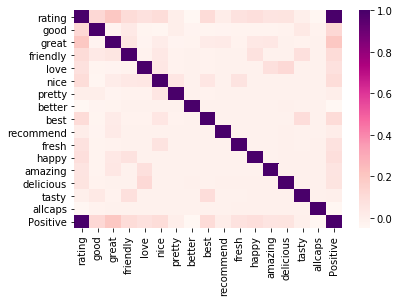

In [315]:
sns.heatmap(yelp2.corr(), cmap="RdPu")

In [373]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

y_pred2 = bnb.fit(data2, target2).predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 == y_pred2).sum()
))
print('Gaussian success rate = %s' % ((data2.shape[0] - (target2 == y_pred2).sum())/data2.shape[0]))

Number of mislabeled points out of a total 1000 points : 600
Gaussian success rate = 0.4


In [382]:
cm2 = confusion_matrix(target2, y_pred2)
print(cm2)

# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm2[0][0]/(cm2[0][0]+cm2[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm2[1][0]/(cm2[1][0]+cm2[1][1])))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data2, target2, cv=10)

[[476  24]
 [351 149]]
Sensitivity: 0.952
Specificity: 0.702


array([0.59, 0.61, 0.63, 0.63, 0.63, 0.6 , 0.67, 0.6 , 0.59, 0.67])

In [375]:
bnb = MultinomialNB()

y_pred2 = bnb.fit(data2, target2).predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 == y_pred2).sum()
))
print('Multinomial success rate = %s' % ((data2.shape[0] - (target2 == y_pred2).sum())/data2.shape[0]))

Number of mislabeled points out of a total 1000 points : 597
Multinomial success rate = 0.403


In [383]:
cm2 = confusion_matrix(target2, y_pred2)
print(cm2)

# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm2[0][0]/(cm2[0][0]+cm2[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm2[1][0]/(cm2[1][0]+cm2[1][1])))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data2, target2, cv=10)

[[476  24]
 [351 149]]
Sensitivity: 0.952
Specificity: 0.702


array([0.59, 0.61, 0.63, 0.63, 0.63, 0.6 , 0.67, 0.6 , 0.59, 0.67])

In [379]:
bnb = BernoulliNB()

y_pred2 = bnb.fit(data2, target2).predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 == y_pred2).sum()
))
print('Bernoulli success rate = %s' % ((data2.shape[0] - (target2 == y_pred2).sum())/data2.shape[0]))

Number of mislabeled points out of a total 1000 points : 625
Bernoulli success rate = 0.375


In [386]:
cm2 = confusion_matrix(target2, y_pred2)
print(cm2)

# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm2[0][0]/(cm2[0][0]+cm2[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm2[1][0]/(cm2[1][0]+cm2[1][1])))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data2, target2, cv=10)

[[476  24]
 [351 149]]
Sensitivity: 0.952
Specificity: 0.702


array([0.59, 0.61, 0.63, 0.63, 0.63, 0.6 , 0.67, 0.6 , 0.59, 0.67])

In [323]:
## Classify Version 2
## Instead of looking for Good rating, we are looking for Bad rating instead.

data_path3 = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/yelp_labelled.txt"
            )
yelp3 = pd.read_csv(data_path3, delimiter= '\t', header=None)
yelp3.columns = ['message', 'rating']
keywords = ['good', 'great', 'friendly', 'love', 'nice', 'pretty', 'better', 'best', 'recommend', 'fresh', 'happy', 'amazing', 'delicious', 'tasty']
print(yelp3.head())


for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp3[str(key)] = yelp3.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
yelp3.head()

                                             message  rating
0                           Wow... Loved this place.       1
1                                 Crust is not good.       0
2          Not tasty and the texture was just nasty.       0
3  Stopped by during the late May bank holiday of...       1
4  The selection on the menu was great and so wer...       1


,message,rating,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [325]:
yelp3['allcaps'] = yelp3.message.str.isupper()
yelp3['Negative'] = (yelp3['rating'] == 0)
data3 = yelp3[keywords + ['allcaps']]
target3 = yelp3['Negative']

yelp3.head()

,message,rating,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty,allcaps,Positive,Negative
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


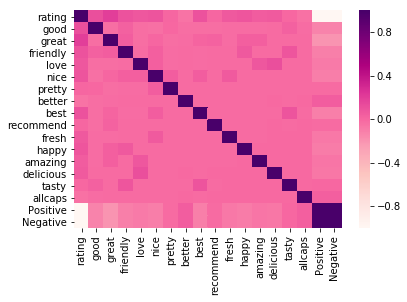

In [326]:
sns.heatmap(yelp3.corr(), cmap="RdPu")

In [327]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

y_pred3 = bnb.fit(data3, target3).predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))
print('Gaussian success rate = %s' % ((data3.shape[0] - (target3 == y_pred3).sum())/data3.shape[0]))

Number of mislabeled points out of a total 1000 points : 400
Gaussian success rate = 0.4


In [387]:
cm3 = confusion_matrix(target3, y_pred3)
print(cm3)

# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm3[0][0]/(cm3[0][0]+cm3[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm3[1][0]/(cm3[1][0]+cm3[1][1])))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data3, target3, cv=10)

[[443  57]
 [459  41]]
Sensitivity: 0.886
Specificity: 0.918


array([0.59, 0.61, 0.63, 0.63, 0.63, 0.6 , 0.67, 0.6 , 0.59, 0.67])

In [368]:
bnb = MultinomialNB()

y_pred3 = bnb.fit(data3, target3).predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))
print('Multinomial success rate = %s' % ((data3.shape[0] - (target3 != y_pred3).sum())/data3.shape[0]))

Number of mislabeled points out of a total 1000 points : 516
Multinomial success rate = 0.484


In [388]:
cm3 = confusion_matrix(target3, y_pred3)
print(cm3)

# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm3[0][0]/(cm3[0][0]+cm3[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm3[1][0]/(cm3[1][0]+cm3[1][1])))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data3, target3, cv=10)

[[443  57]
 [459  41]]
Sensitivity: 0.886
Specificity: 0.918


array([0.59, 0.61, 0.63, 0.63, 0.63, 0.6 , 0.67, 0.6 , 0.59, 0.67])

In [366]:
bnb = BernoulliNB()

y_pred3 = bnb.fit(data3, target3).predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))
print('Bernoulli success rate = %s' % ((data3.shape[0] - (target3 != y_pred3).sum())/data3.shape[0]))

Number of mislabeled points out of a total 1000 points : 375
Bernoulli success rate = 0.625


In [389]:
cm3 = confusion_matrix(target3, y_pred3)
print(cm3)

# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm3[0][0]/(cm3[0][0]+cm3[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm3[1][0]/(cm3[1][0]+cm3[1][1])))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data3, target3, cv=10)

[[443  57]
 [459  41]]
Sensitivity: 0.886
Specificity: 0.918


array([0.59, 0.61, 0.63, 0.63, 0.63, 0.6 , 0.67, 0.6 , 0.59, 0.67])

In [330]:
## Classify Version 3
## Remove any reviews that have less than 5 words. 
data_path4 = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/yelp_labelled.txt"
            )
yelp4 = pd.read_csv(data_path4, delimiter= '\t', header=None)
yelp4.columns = ['message', 'rating']
keywords = ['good', 'great', 'friendly', 'love', 'nice', 'pretty', 'better', 'best', 'recommend', 'fresh', 'happy', 'amazing', 'delicious', 'tasty']
print(yelp4.head())


for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp4[str(key)] = yelp4.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
yelp4.head()

                                             message  rating
0                           Wow... Loved this place.       1
1                                 Crust is not good.       0
2          Not tasty and the texture was just nasty.       0
3  Stopped by during the late May bank holiday of...       1
4  The selection on the menu was great and so wer...       1


,message,rating,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [331]:
yelp4['message_words'] = yelp4['message'].apply(lambda x: len(x.split(' ')))
yelp4.head()

,message,rating,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty,message_words
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,8
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,15
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,12


In [332]:
yelp4 = yelp4[yelp4['message_words'] >= 5]
yelp4.head()

,message,rating,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty,message_words
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,8
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,15
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,12
5,Now I am getting angry and I want my damn pho.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,11
6,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6


In [336]:
yelp4['allcaps'] = yelp4.message.str.isupper()
yelp4['Positive'] = (yelp4['rating'] == 1)
data4 = yelp4[keywords + ['allcaps']]
target4 = yelp4['Positive']
yelp4.head()

,message,rating,good,great,friendly,love,nice,pretty,better,best,recommend,fresh,happy,amazing,delicious,tasty,message_words,allcaps,Positive
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,8,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,15,False,True
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,12,False,True
5,Now I am getting angry and I want my damn pho.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,11,False,False
6,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6,False,False


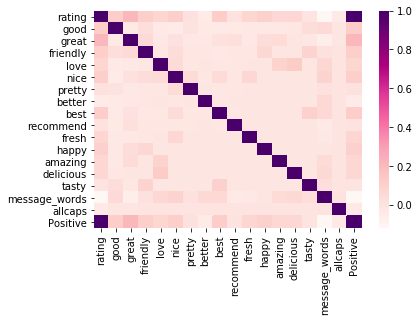

In [338]:
sns.heatmap(yelp4.corr(), cmap="RdPu")

In [339]:
data4 = yelp4[keywords + ['allcaps']]
target4 = yelp4['Positive']

In [355]:

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))
print('Gaussian success rate = %s' % ((data4.shape[0] - (target4 != y_pred4).sum())/data4.shape[0]))

Number of mislabeled points out of a total 840 points : 325
Gaussian success rate = 0.6130952380952381


In [358]:
cm4 = confusion_matrix(target4, y_pred4)
print(cm4)

[[411  10]
 [315 104]]


In [390]:
# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm4[0][0]/(cm4[0][0]+cm4[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm4[1][0]/(cm4[1][0]+cm4[1][1])))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data4, target4, cv=10)

Sensitivity: 0.9762470308788599
Specificity: 0.7517899761336515


array([0.63529412, 0.61904762, 0.63095238, 0.6547619 , 0.64285714,
       0.6547619 , 0.6547619 , 0.64285714, 0.55952381, 0.68674699])

In [393]:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))
print('Bernoulli success rate = %s' % ((data4.shape[0] - (target4 != y_pred4).sum())/data4.shape[0]))

Number of mislabeled points out of a total 840 points : 304
Bernoulli success rate = 0.638095238095238


In [350]:
cm4 = confusion_matrix(target4, y_pred4)
print(cm4)

[[397  24]
 [280 139]]


In [391]:
# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm4[0][0]/(cm4[0][0]+cm4[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm4[1][0]/(cm4[1][0]+cm4[1][1])))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data4, target4, cv=10)

Sensitivity: 0.9762470308788599
Specificity: 0.7517899761336515


array([0.63529412, 0.61904762, 0.63095238, 0.6547619 , 0.64285714,
       0.6547619 , 0.6547619 , 0.64285714, 0.55952381, 0.68674699])

In [394]:
bnb = MultinomialNB()

# Fit our model to the data.
bnb.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))
print('Multinomial success rate = %s' % ((data4.shape[0] - (target4 != y_pred4).sum())/data4.shape[0]))

Number of mislabeled points out of a total 840 points : 333
Multinomial success rate = 0.6035714285714285


In [353]:
cm4 = confusion_matrix(target4, y_pred4)
print(cm4)

[[414   7]
 [326  93]]


In [392]:
# Sensitivity - Ability to correctly identify a positive review
print('Sensitivity: ' + str(cm4[0][0]/(cm4[0][0]+cm4[0][1])))

# Specificity: Ability to correctly identify negative review
print('Specificity: ' + str(cm4[1][0]/(cm4[1][0]+cm4[1][1])))

from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data4, target4, cv=10)

Sensitivity: 0.9762470308788599
Specificity: 0.7517899761336515


array([0.63529412, 0.61904762, 0.63095238, 0.6547619 , 0.64285714,
       0.6547619 , 0.6547619 , 0.64285714, 0.55952381, 0.68674699])

""" 
For this Challenge, my classifiers does not overfit because all the keywords are independent to each other.
Overall, BernoulliNB performed the best as it come out top most often. Second best method to use is both MultinomialNB, 
and Gaussian since they both come out as a tie. One reason why BernoulliNB works the best is because the 
dataset have Categorical inputs, and GaussianNB work best with Categorical. 

The most impactful classifier is removing reviews that are 4 words or less as we can assume the review is very bad, with no meaning behind it. 
Removing this  help our success rate to raise over 60% success rate. At the same time, our Sensitivity for sensing Positive and Specificity for sensing negative reviews have also raisen as well. 97.62% and 75.18% respectively.

"""